# Gaussian Process Regression

Given a set of training data samples and their corresponding function values, can we estimate the function values for a set of test data samples?

In [16]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

Let us first generate our training data, $(x, f(x))$ where $f(x) = \sin{0.9x}$

In [17]:
# Prior data samples
nTrain = 10
nTest = 50
X = np.random.uniform(-5, 5, size=(nTrain,1))

In [18]:
# Function values corresponding to these data samples
f = lambda x: np.sin(0.9*x).flatten()

Let us consider that the training data has some i.i.d noise, 
$\therefore y = f(X) + \epsilon$

In [19]:
# Let us consider i.i.d. noise
s = 0.00005    # noise variance
y = f(X) + s*np.random.randn(nTrain)

Like before, let us define our Gaussian Process the same way we did last time

In [20]:
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 10
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

In [21]:
# Calculate the covariance matrix of the sum of Gaussians and its square root using Cholesky Decomposition
K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(nTrain))

Let us say that we want to make predictions on some points in the domain [-5, 5]

In [22]:
# Points that we need to make predictions at
Xtest = np.linspace(-5, 5, nTest).reshape(-1,1)

Using the Multivariate Gaussian Theorem, we know that the conditional probability can be given by
$$\vec{y_*} \mid \vec{y}, X, X_*  \sim \mathcal{N} (\mu^*, \Sigma^*)$$
where,
$$\mu^* = K(X_*, X) (K(X, X) + \sigma^2 I)^{-1}\vec{y}$$ and
$$\Sigma^* = K(X_*, X_*) + \sigma^2I - K(X_*, X)(K(X, X) + \sigma^2 I)^{-1} K(X, X^*)$$



In [23]:
# Calculating the conditional probability

# Compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# Compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

Now all that is left to do is sample from this distribution at our test points and we will get some possible functions

We do this in the same way as before, using Inverse Cumulative Sampling

[-5, 5, -3, 3]

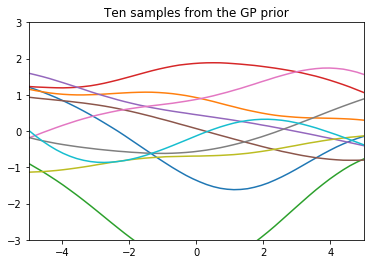

In [24]:
# Draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(nTest))
f_prior = np.dot(L, np.random.normal(size=(nTest,10)))
plt.figure(1)
plt.clf()
plt.plot(Xtest, f_prior)
plt.title('Ten samples from the GP prior')
plt.axis([-5, 5, -3, 3])

[-5, 5, -3, 3]

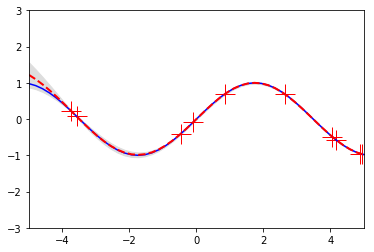

In [25]:
plt.figure(2)
plt.clf()
# Display the train points and the corresponding noisy function values as red plus signs
plt.plot(X, y, 'r+', ms=20)

# Display the test points and the corresponding function values as a smooth blue curve
plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")

# Plot the mean of our posterior prediction as a dashed red curve
plt.plot(Xtest, mu, 'r--', lw=2)
plt.axis([-5, 5, -3, 3])

[-5, 5, -3, 3]

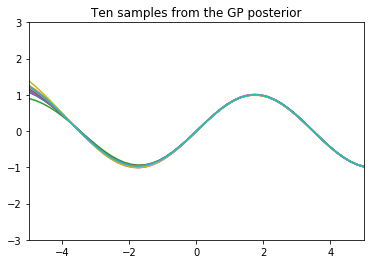

In [26]:
# Draw samples from the posterior at our test points
L = np.linalg.cholesky(K_ + 1e-6*np.eye(nTest) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(nTest,10)))
plt.figure(3)
plt.clf()
plt.plot(Xtest, f_post)
plt.title('Ten samples from the GP posterior')
plt.axis([-5, 5, -3, 3])